# Pytorch tutorial

In this tutorial we will cover some basic concepts of optimization using [Pytorch](https://pytorch.org/) machine learning library.

We will go through
1. introduction to pytorch
2. Example of using gradient descent on simple function
3. Define and train Neural Networks for classification task


some usefully links
1. pytorch documentation: https://pytorch.org/docs/stable/
2. pytorch tutorials: https://pytorch.org/tutorials/beginner/basics/intro.html

# 1. Introduction to Pytorch

Pytorch is one of the most famous libraries to develop deep learning models.  

We will go thought the basic concepts pytorch while we will explain more as we move forward on the tutorial.  

We will use Pytorch version: '2.1.0'

In [1]:
# you can install torch by using the following command
# !pip install torch==2.1.0

In [2]:
# you can install torchsummary by using the following command
# !pip install torchsummary

In [3]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [4]:
torch.__version__

'2.1.0'

# Tensors

Tensors is one of the fundamental componentes of pytorch.  
You can think of tensors as a numpy arrays.

Using Tensors pytorch is able to create computational graphs and calculate the gradients.

Tensors support different kind of operations listed in the following [link](https://pytorch.org/docs/stable/torch.html#pointwise-ops)  
Apart from the pytorch operators we can apply python operators between tensors.

In [5]:
tensor_1 = torch.tensor([[1., 2.], 
                         [3., 3.]])

tensor_2 = torch.tensor([[1., 0], 
                         [-1., 0]])

In [6]:
print("tensor_1 shape: ", tensor_1.shape)
print("tensor_2 shape: ", tensor_2.shape)

tensor_1 shape:  torch.Size([2, 2])
tensor_2 shape:  torch.Size([2, 2])


In [7]:
elem_mul = tensor_1 * tensor_2
print("Element wise multiplication")
print("Result shape: ", elem_mul.size())
elem_mul

Element wise multiplication
Result shape:  torch.Size([2, 2])


tensor([[ 1.,  0.],
        [-3.,  0.]])

In [8]:
matrix_mul = torch.matmul(tensor_1,tensor_2)
print("Matrix multiplication")
print("Result shape: ", matrix_mul.size())
torch.matmul(tensor_1,tensor_2)

Matrix multiplication
Result shape:  torch.Size([2, 2])


tensor([[-1.,  0.],
        [ 0.,  0.]])

In [9]:
# get tensor as numpy array
tensor_1.data.numpy()

array([[1., 2.],
       [3., 3.]], dtype=float32)

To begin lets define a simple polynomial function.

In [10]:
def f(x):
    """
    A convex function
    f(x) = (x-5)^2
    """
    y = (x-5)**2
    return y

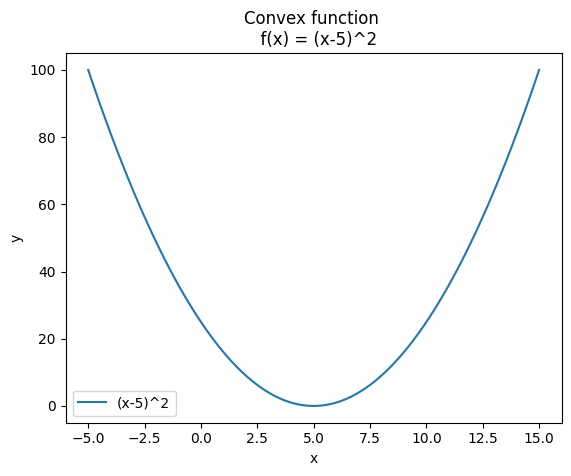

In [11]:
x = torch.linspace(-5, 15,100)

plt.figure()
plt.plot(x, f(x), label = "(x-5)^2")
plt.legend()
plt.title("Convex function \n  f(x) = (x-5)^2")
plt.ylabel("y")
plt.xlabel("x")
plt.show()
plt.close()



The above function has the following computational graph

<p align="center">
  <img style="float: left;" src="./figures/Computational_Graph.png" width="500"/>
</p>

The libraries that implement automatic differentiation keep track of the different operation between variables to construct the computational graph.

Having this graph allows us to compute the gradients of complex function.


Having a computational graph we have two main operation:
1. **Forward pass**: calculate the output of the computational graph. In our example the value of f(x)
2. **Backward pass**: calculate the gradients of each node in the computational graph.
   Having the gradients of each node allows us to calculate the final gradient of each node using the chain rule of differentiation.In our example the df/dx.


<p align="center">
  <img style="float: left;" src="./figures/Auto_diff_Computational_Graph.png" width="900"/>
</p>

In [12]:
# create tensors with requires_grad = true in order to indicate pytorch to track the gradients of the tensor.
x = torch.tensor(5.0, requires_grad = True)

# get the output of a function
y = f(x) # forward pass

# Compute gradients using backward function for y
y.backward()

# Access the gradients using x.grad
gradient = x.grad
print("gradient df(x)/dx|(x=5) :", gradient.data.numpy())

gradient df(x)/dx|(x=5) : 0.0


In [13]:
def grad_f(x):
    """
    return the gradient of the function evaluated at x.
    """
    grad = 2*(x-5)
    return grad

In [14]:
x = 5

print("f(x=5)=",f(x))
print("Analytic Gradient df/dx|(x=5)=", grad_f(5))

f(x=5)= 0
Analytic Gradient df/dx|(x=5)= 0


# Gradient Decent

**Gradient Descent (GD)** is a iterative method to find a minimum of a **convex function**.

**Gradient descent** is one of the most popular algorithms to perform optimization and by far the most common way to optimize neural networks.

In machine learning, Gradient descent is a way to minimize an objective function whit respect to model’s parameters by updating the parameters in the opposite direction of the gradient of the objective function w.r.t. to the parameters.

<figure>
  <img style="float: left;" src="./figures/Gradiend_descent.png" width="800"/>
</figure>

### Implement Gradient Descent
in the following example we will find the minimum of a function using gradient decent.


<figure>
  <img style="float: left;" src="./figures/sgd.png" width="400"/>
</figure>|

In [15]:
x_init= -13.0
thr = 0.0001
step_max = 500
lr = 0.1
min_value = 0

function = f

def gradient_decent(function, x_init, min_value, lr, step_max, thr):
    x = torch.tensor(x_init, requires_grad = True)
    
    x_history = [x.data]
    step = 0 
    while step < step_max:
        # step 1. Forward pass to get the output
        y = function(x)

        # step 2. Backward pass to calculate the gradient
        y.backward()

        # step 3. Update x to find minimum
        gradient = x.grad.data
        x.data = x.data - lr * gradient
        x.grad.data.zero_() # tenchical steps, otherwise accumulate the gradients

        # just keep the values of x
        x_history += [x.data]
        step = step +1
        
        # stoping critiria
        if abs(function(x.data) - function(x_history[-2])) < thr:
            break
    x_history = np.array(x_history)
    return x.data, step, x_history 

In [16]:
x_min, total_steps, x_history = gradient_decent(function = f, 
                                                x_init = -3.0 ,
                                                min_value=0,
                                                lr = 0.1,
                                                step_max = 100,
                                                thr = 0.000001)

In [17]:
print("Total steps to achive minimum:" , total_steps)
print("Minimum:" , x_min.data.numpy())

Total steps to achive minimum: 39
Minimum: 4.9986706


In [18]:
x_history = np.array(x_history)

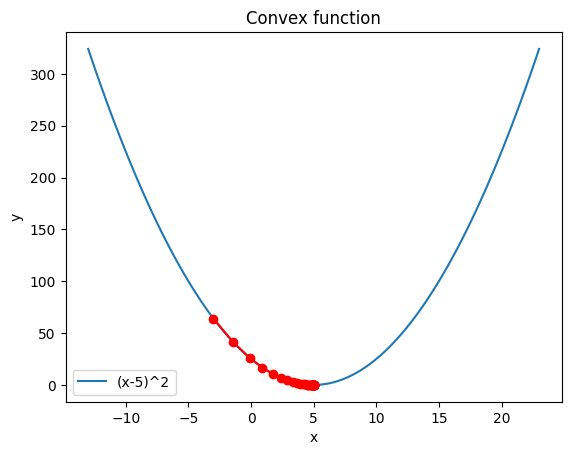

In [19]:
x = np.linspace(-13, 23,100)
# x_history = np.array()
plt.figure()
plt.plot(x, f(x), label = "(x-5)^2")
plt.plot(x_history, f(x_history),marker = "o", color="r")
plt.legend()
plt.title("Convex function")
plt.ylabel("y")
plt.xlabel("x")
plt.show()
plt.close()

### lr = 0.005

In [20]:
x_min, total_steps, x_history = gradient_decent(function = f, 
                                                x_init = -3.0 ,
                                                min_value=0,
                                                lr = 0.005,
                                                step_max = 600,
                                                thr = 0.001)

In [21]:
print("Total steps to achive minimum:" , total_steps)
print("Minimum:" , x_min.data.numpy())

Total steps to achive minimum: 357
Minimum: 4.7787657


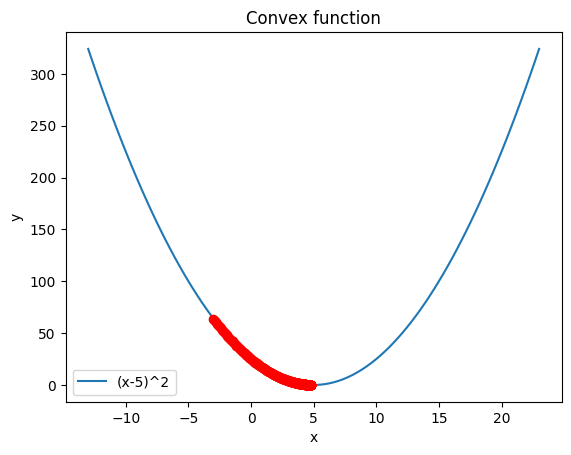

In [22]:
x = np.linspace(-13, 23,100)
# x_history = np.array()
plt.figure()
plt.plot(x, f(x), label = "(x-5)^2")
plt.plot(x_history, f(x_history),marker = "o", color="r")
plt.legend()
plt.title("Convex function")
plt.ylabel("y")
plt.xlabel("x")
plt.show()
plt.close()

### lr = 0.7

In [23]:
x_min, total_steps, x_history = gradient_decent(function = f, 
                                                x_init = -3.0 ,
                                                min_value=0,
                                                lr = 0.7,
                                                step_max = 100,
                                                thr = 0.000001)

In [24]:
print("Total steps to achive minimum:" , total_steps)
print("Minimum:" , x_min.data.numpy())

Total steps to achive minimum: 11
Minimum: 5.0003357


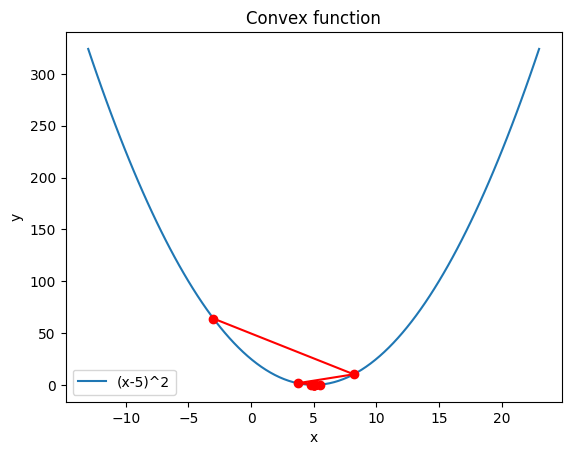

In [25]:
x = np.linspace(-13, 23,100)
# x_history = np.array()
plt.figure()
plt.plot(x, f(x), label = "(x-5)^2")
plt.plot(x_history, f(x_history),marker = "o", color="r")
plt.legend()
plt.title("Convex function")
plt.ylabel("y")
plt.xlabel("x")
plt.show()
plt.close()

### lr = 1.1

In [26]:
x_min, total_steps, x_history = gradient_decent(function = f, 
                                                x_init = -3.0 ,
                                                min_value=0,
                                                lr = 1.1,
                                                step_max = 5,
                                                thr = 0.001)

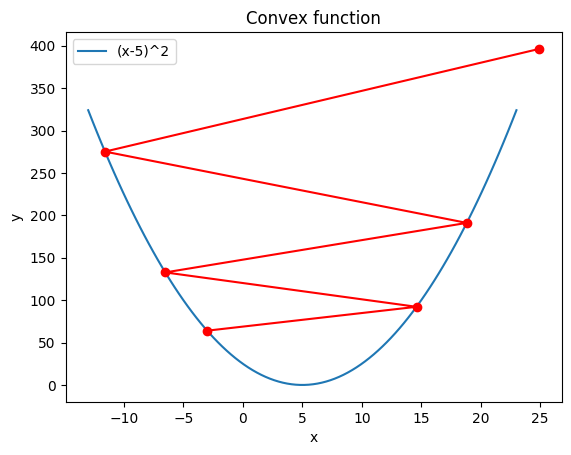

In [27]:
x = np.linspace(-13, 23,100)
# x_history = np.array()
plt.figure()
plt.plot(x, f(x), label = "(x-5)^2")
plt.plot(x_history, f(x_history),marker = "o", color="r")
plt.legend()
plt.title("Convex function")
plt.ylabel("y")
plt.xlabel("x")
plt.show()
plt.close()

# Load Adult dataset

In [28]:
from collections import OrderedDict

data_types = OrderedDict([
    ("age", "int"),
    ("workclass", "category"),
    ("final_weight", "int"),  # originally it was called fnlwgt
    ("education", "category"),
    ("education_num", "int"),
    ("marital_status", "category"),
    ("occupation", "category"),
    ("relationship", "category"),
    ("race", "category"),
    ("sex", "category"),
    ("capital_gain", "float"),  # required because of NaN values
    ("capital_loss", "int"),
    ("hours_per_week", "int"),
    ("native_country", "category"),
    ("income_class", "category"),
])
target_column = "income_class"

In [29]:
def read_dataset(path):
    return pd.read_csv(
        path,
        names=data_types,
        index_col=None,

        comment='|',  # test dataset has comment in it
        skipinitialspace=True,  # Skip spaces after delimiter
        na_values={
            'capital_gain': 99999,
            'workclass': '?',
            'native_country': '?',
            'occupation': '?',
        },
        dtype=data_types,
    )

def clean_dataset(data):
    # Test dataset has dot at the end, we remove it in order
    # to unify names between training and test datasets.
    data['income_class'] = data.income_class.str.rstrip('.').astype('category')

    # Remove final weight column since there is no use
    # for it during the classification.
    data = data.drop('final_weight', axis=1)

    # Duplicates might create biases during the analysis and
    # during prediction stage they might give over-optimistic
    # (or pessimistic) results.
    data = data.drop_duplicates()

    # Binary target variable (>50K == 1 and <=50K == 0)
    data[target_column] = (data[target_column] == '>50K').astype(int)

    # Categorical dataset
    categorical_features = data.select_dtypes('category').columns
    data[categorical_features] = data.select_dtypes('category').apply(lambda x: x.cat.codes)
    return data

In [30]:
!pip install --upgrade certifi

You should consider upgrading via the '/Users/andreasathanasopoulos/Phd/projects/bayesian_fairness/envs/bayesian-fairness/bin/python3.9 -m pip install --upgrade pip' command.


In [33]:
import pandas as pd
# get and clean train dataset
TRAIN_DATA_FILE = 'adult/adult.data'
train_data = clean_dataset(read_dataset(TRAIN_DATA_FILE))
train_data = train_data.dropna()
print("Train dataset shape:", train_data.shape)

# get and clean test dataset
TEST_DATA_FILE = 'adult/adult.test'
test_data = clean_dataset(read_dataset(TEST_DATA_FILE))
test_data = test_data.dropna()
print("Test dataset shape:", test_data.shape)

Train dataset shape: (28938, 14)
Test dataset shape: (15175, 14)


In [34]:
target_column = "income_class"
features = train_data.columns.difference([target_column])
sensitive_feature = ["sex"]
non_sensitive_features = list(set(features).difference(set(sensitive_feature)))

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train_data[features], train_data[[target_column]], test_size=0.1)
X_test, y_test = test_data[features], test_data[[target_column]]

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train),columns = features)
X_val = pd.DataFrame(scaler.transform(X_val),columns = features)
X_test = pd.DataFrame(scaler.transform(X_test),columns = features)

In [37]:
X_train.shape, X_val.shape, X_test.shape

((26044, 13), (2894, 13), (15175, 13))

# Neural Networks

Neural Networks are powerful function approximator that archives state-of-the-art performance on a lot of application the last decade on machine learning.

The performance of the Deep Neural Network's is due to their high number of parameters and the efficient learning methods used to train those networks.
For example the gtp-3 languages model was about by 175 billion parameters.

Neural Networks, adjust their parameters (training), using the gradient descent method to **minimise a loss function** $L$.

<figure>
  <img style="float: left;" src="./figures/neural_net_new.png" width="800"/>
</figure>|

### Operation of each node

<figure>
  <img style="float: left;" src="./figures/neuron_2.png" width="600"/>
</figure>

# Activation Functions

Activation functions play an integral role in neural networks by introducing non-linearity.
This non-linearity allows neural networks to develop complex representations and functions based on the inputs that would not be possible with a simple linear layers.

Bellow we illustrate some of the most famous activation functions

<figure>
  <img style="float: left;" src="./figures/acitvation_fun.png" width="600"/>
</figure>

# Classification problem

In classification problem the output of the neural network can be probability of each class p(y|x).

So for binary classification we can do that using a single output to indicate the p(y=1|x).
This has to be bounded between [0,1] in order to be a probability.
To do so we can use the sigmoid function that we can illustrate bellow.

<figure>
  <img style="float: left;" src="./figures/sigmoid.png" width="400"/>
</figure>

Then we can use the binary cross entropy loss as the **loss function**

<figure>
  <img style="float: left;" src="./figures/binary_ce.png" width="400"/>
</figure>



Where
$$\hat{Y} = f(x) = p(y=1|x)$$

As a note, for regression problem we don't use activation function in the final layer, while loss function is usually the mean square error.

# Define Neural Network with pytorch

We will implement a simple neural network for classification problem with pytorch.  
The following network has 2 hidden layers following by an output layer.

In [128]:
class NeuralNetwork(torch.nn.Module):
    """
    Simple two layer neural network for regression
    """
    def __init__(self, num_input_features):
        super().__init__()
        
        # layer 1
        layer_1_units = 200
        self.layer_1 = torch.nn.Linear(in_features=num_input_features,
                                       out_features=layer_1_units)
        self.activation_1 = torch.nn.ReLU()
        
        # layer  2
        layer_2_units = 100
        self.layer_2 = torch.nn.Linear(in_features=layer_1_units,
                                       out_features=layer_2_units)
        self.activation_2 = torch.nn.ReLU()
        
        # layer output layer
        self.out_layer = torch.nn.Linear(in_features=layer_2_units,
                                         out_features=1)
        self.out_activation= torch.nn.Sigmoid()

    def forward(self, x):
        x_1 = self.activation_1( self.layer_1( x ) )
        x_2 = self.activation_2( self.layer_2( x_1 ) )
        output = self.out_activation(self.out_layer(x_2))
        return output

In [39]:
from torchsummary import summary
model = NeuralNetwork(num_input_features=12)
summary(model, input_size= [[12]])

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 200]           2,600
              ReLU-2                  [-1, 200]               0
            Linear-3                  [-1, 100]          20,100
              ReLU-4                  [-1, 100]               0
            Linear-5                    [-1, 1]             101
           Sigmoid-6                    [-1, 1]               0
Total params: 22,801
Trainable params: 22,801
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.09
Estimated Total Size (MB): 0.09
----------------------------------------------------------------


### make predictions

In [40]:
x = torch.rand((100,12))
                  
predicted_proba = model.forward(x)

In [41]:
predicted_proba.shape # p(y=1|x)

torch.Size([100, 1])

In [42]:
predicted_proba

tensor([[0.5317],
        [0.5437],
        [0.5248],
        [0.5363],
        [0.5278],
        [0.5261],
        [0.5274],
        [0.5375],
        [0.5321],
        [0.5306],
        [0.5225],
        [0.5293],
        [0.5308],
        [0.5348],
        [0.5289],
        [0.5277],
        [0.5347],
        [0.5375],
        [0.5331],
        [0.5226],
        [0.5292],
        [0.5321],
        [0.5305],
        [0.5309],
        [0.5358],
        [0.5249],
        [0.5279],
        [0.5155],
        [0.5299],
        [0.5257],
        [0.5409],
        [0.5370],
        [0.5220],
        [0.5251],
        [0.5256],
        [0.5326],
        [0.5201],
        [0.5253],
        [0.5390],
        [0.5316],
        [0.5297],
        [0.5276],
        [0.5448],
        [0.5257],
        [0.5193],
        [0.5345],
        [0.5446],
        [0.5319],
        [0.5281],
        [0.5265],
        [0.5441],
        [0.5367],
        [0.5297],
        [0.5162],
        [0.5261],
        [0

### optimise network
perfom a single iteration of sgd.

In [43]:
model = NeuralNetwork(num_input_features=12)

# to make the optimization pytorch has different optimizers. 
lr = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=lr)
loss_fn = torch.nn.BCELoss()

In [44]:
model.layer_2.weight

Parameter containing:
tensor([[-0.0661, -0.0415, -0.0521,  ..., -0.0669,  0.0267,  0.0461],
        [-0.0169, -0.0116, -0.0082,  ..., -0.0040, -0.0072, -0.0219],
        [-0.0664,  0.0338,  0.0549,  ..., -0.0326, -0.0311,  0.0242],
        ...,
        [ 0.0642,  0.0247,  0.0279,  ..., -0.0529,  0.0426,  0.0067],
        [ 0.0150, -0.0131, -0.0366,  ..., -0.0325, -0.0481, -0.0499],
        [ 0.0236, -0.0301, -0.0202,  ...,  0.0294, -0.0656,  0.0221]],
       requires_grad=True)

In [45]:
x = torch.rand((100, 12))
y = torch.randint(0, 1, (100, 1), dtype = torch.float)
                  
predicted_proba = model.forward(x)
loss = loss_fn(predicted_proba, y)
                  
loss.backward()
optimizer.step() # the optimiser aply the gradients to change the weights.

optimizer.zero_grad() # reset the gradients

In [46]:
model.layer_2.weight

Parameter containing:
tensor([[-0.0661, -0.0415, -0.0522,  ..., -0.0671,  0.0265,  0.0461],
        [-0.0169, -0.0116, -0.0082,  ..., -0.0040, -0.0072, -0.0219],
        [-0.0664,  0.0338,  0.0549,  ..., -0.0326, -0.0310,  0.0242],
        ...,
        [ 0.0642,  0.0247,  0.0279,  ..., -0.0528,  0.0428,  0.0068],
        [ 0.0150, -0.0131, -0.0366,  ..., -0.0325, -0.0481, -0.0499],
        [ 0.0236, -0.0301, -0.0202,  ...,  0.0294, -0.0656,  0.0221]],
       requires_grad=True)

# Batching data

When we train neural network we usually train our model using batches of training example.


<figure>
  <img style="float: left;" src="./figures/batches.png" width="500"/>
</figure>



Batching method is performed for different reasons.
First of all in we have a huge dataset we cannot fit all the data in our memery.
Moreover, using batches requires less time to fit the model as in the same time you can perform more update in the weights of the model. One drawback of using batches is that we approximate the gradient directions, so having very small batch size can affect the coverage of your model.

So batch size is an additional hyperparameter of our training algorithm.

<figure>
  <img style="float: left;" src="./figures/train_loop.png" width="500"/>
</figure>

lets use pytorch to batch our data. 

In summary PyTorch provides two main data classes: **DataLoader** and **Dataset** to handle your data. 

**Dataset**  stores the samples and their corresponding labels, and **DataLoader** wraps an iterable around the Dataset to enable easy access to the batches.

you can read more at: https://pytorch.org/tutorials/beginner/basics/data_tutorial.html

In [47]:
# covert data into tensors
train_x_tensor = torch.tensor(X_train.values, dtype=torch.float)
train_y_tensor = torch.tensor(y_train.values, dtype=torch.float)

# use the dataset class wrapper for tensors
train_tensor_dataset = torch.utils.data.TensorDataset(train_x_tensor, train_y_tensor)# there are more coplex dataset
                                                                                     # i.e images or text data

# pass the dataset class into Dataloader to batch and shuffle your data
train_dataloader = torch.utils.data.DataLoader(train_tensor_dataset,
                                               batch_size=64,
                                               shuffle=True)

In [48]:
for i, batch in enumerate(train_dataloader):
    batch_x, batch_y = batch # get next iteam

In [49]:
batch_x.shape

torch.Size([60, 13])

In [50]:
# convert val data to tensor for later
val_x_tensor = torch.tensor(X_val.values, dtype=torch.float)
val_y_tensor = torch.tensor(y_val.values, dtype=torch.float)

# Define training loop


<figure>
  <img style="float: left;" src="./figures/train_loop.png" width="400"/>
</figure>

In [51]:
def training_step(model, input_data, optimizer, loss_fn):
    # reset gradients of the optimizer
    optimizer.zero_grad()
    
    # unfold data
    x_batch, y_batch = input_data
    
    # get predictions
    y_pred_propa = model(x_batch)
    
    # calculate loss
    loss = loss_fn(y_pred_propa, y_batch)

    # compute gradients 
    loss.backward()
    
    # optimise network
    optimizer.step()
    
    # compute metrics for monitoring
    with torch.no_grad(): 
        y_pred = (y_pred_propa>0.5) * 1
        train_acc = torch.sum(y_pred == y_batch) / y_batch.shape[0]

    return loss.data.numpy(), train_acc.data.numpy()

In [52]:
def evaluation_step(model, input_data, loss_fn):
    # when we use torch.no_grad pytorch didnt store information
    # that is required to calculate gradients so is fasterr 
    with torch.no_grad(): 
        x_batch, y_batch = input_data
        y_pred_proba = model(x_batch)
        loss = loss_fn(y_pred_proba, y_batch)

        # compute metrics
        y_pred = (y_pred_proba>0.5) * 1
        acc = torch.sum(y_pred == y_batch) / y_batch.shape[0]
    return loss.data.numpy(), acc.data.numpy()

In [53]:
model = NeuralNetwork(num_input_features=13)

lr = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr=lr)
loss_fn = torch.nn.BCELoss() # binary cross entropy

In [54]:
# parameters of the training loop
epochs = 400

In [55]:
# -------------------- Train  Loop----------------------------
train_history = []
val_history = []
for epoch in range(epochs): # iterate over epoch    

    # -------------------- 1. Training on each epoch ----------------------------
    accumulated_loss,accumulated_accuracy = 0, 0 # monitor loss and metrics during training
    for step, batch_data in enumerate(train_dataloader): # iterate over batch
        loss, accuracy = training_step(model,batch_data,optimizer,loss_fn) # train model using a single batch
        accumulated_loss = (step * accumulated_loss + loss)/(step+1)
        accumulated_accuracy =  (step * accumulated_accuracy + accuracy)/(step+1)
        
    # store the loss and the metrics at the end of each epoch
    train_history += [{"loss":accumulated_loss, "accuracy":accumulated_accuracy, "epoch": epoch}]
    
    # -------------------- 2. Monitor Error on Validation set ----------------------------
    val_loss, val_accuracy = evaluation_step(model, (val_x_tensor, val_y_tensor), loss_fn)
    val_history += [{"loss":val_loss, "accuracy":val_accuracy, "epoch": epoch}]
    if epoch % 10 == 0:
        print(f"Epoch {epoch}/{epochs}:  loss:{accumulated_loss:.3f}, accuracy-:{accumulated_accuracy:.3f}, val_loss:{val_loss:.3f}, val_accuracy->{val_accuracy:.3f}")

Epoch 0/400:  loss:0.470, accuracy-:0.784, val_loss:0.383, val_accuracy->0.836
Epoch 10/400:  loss:0.334, accuracy-:0.841, val_loss:0.331, val_accuracy->0.855
Epoch 20/400:  loss:0.327, accuracy-:0.844, val_loss:0.328, val_accuracy->0.854
Epoch 30/400:  loss:0.325, accuracy-:0.848, val_loss:0.327, val_accuracy->0.857
Epoch 40/400:  loss:0.324, accuracy-:0.849, val_loss:0.358, val_accuracy->0.856
Epoch 50/400:  loss:0.321, accuracy-:0.851, val_loss:0.362, val_accuracy->0.849
Epoch 60/400:  loss:0.324, accuracy-:0.853, val_loss:0.417, val_accuracy->0.857
Epoch 70/400:  loss:0.321, accuracy-:0.854, val_loss:0.415, val_accuracy->0.857
Epoch 80/400:  loss:0.318, accuracy-:0.855, val_loss:0.416, val_accuracy->0.855
Epoch 90/400:  loss:0.316, accuracy-:0.856, val_loss:0.416, val_accuracy->0.852
Epoch 100/400:  loss:0.313, accuracy-:0.857, val_loss:0.419, val_accuracy->0.850
Epoch 110/400:  loss:0.310, accuracy-:0.859, val_loss:0.419, val_accuracy->0.857
Epoch 120/400:  loss:0.308, accuracy-:0

In [56]:
val_history_df = pd.DataFrame(val_history)
train_history_df = pd.DataFrame(train_history)

# Learning Curves and Overfitting

**Overfitting** refers to the phenomenon when our model performs well on the training set but exhibits poor performance on the testing set.

Since neural networks have a large number of parameters, they are prone to overfitting the training data, resulting in bad performance during testing.  
This occurs when the model exploits pattern between the data (X) and the labels (Y) that is not in the testing data.

One way to monitor the performance of our algorithm is by using learning curves.

Learning curves track the performance of the model during training by measuring various metrics at regular optimization steps.   
Learning curves provide valuable insights into the model's behavior, allowing us to detect overfitting.


To identify overfitting, we typically compare the learning curves of the training and validation sets.

<figure>
  <img style="float: left;" src="./figures/epoch-error-curve-fitting.png" width="400"/>
</figure>

For example, in the plot above, we can observe the learning curves of the training and validation sets during training. At the beginning of training, the model minimizes the loss on both the training and validation sets. However, after several epochs, you can see that the validation error starts to increase while the training loss continues to decrease. This indicates that the model is learning patterns specific to the training set that do not generalize well to the validation set, leading to loss increases.

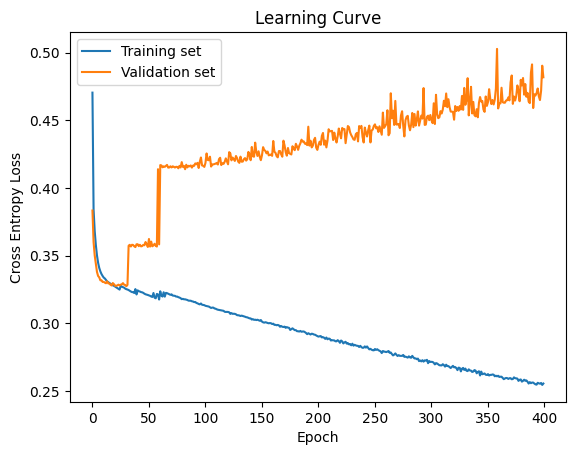

In [57]:
plt.figure()
plt.plot(train_history_df["epoch"],train_history_df["loss"], label = "Training set")
plt.plot(val_history_df["epoch"],val_history_df["loss"], label = "Validation set")
plt.title("Learning Curve")
plt.ylabel("Cross Entropy Loss")
plt.xlabel("Epoch")
plt.legend()

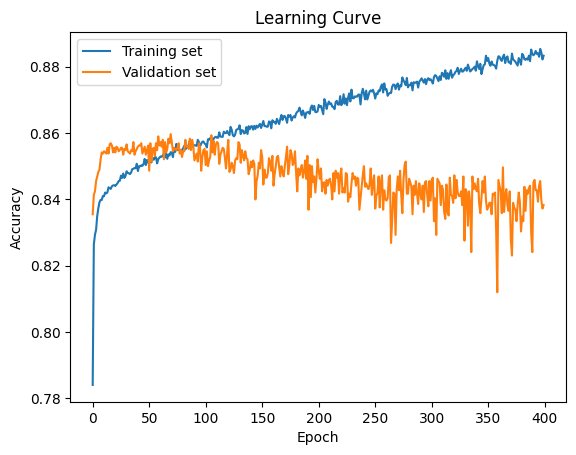

In [58]:
plt.figure()
plt.plot(train_history_df["epoch"],train_history_df["accuracy"], label = "Training set")
plt.plot(val_history_df["epoch"],val_history_df["accuracy"], label = "Validation set")
plt.title("Learning Curve")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend()

# Assigment 6

In the 6th assigment we will see the effect of different techniques to reduce overfiting when training a neural network.
   


# A. Early stopping
Early stopping is an optimization technique used to reduce overfitting without compromising on model accuracy. The main idea behind early stopping is to stop training before a model starts to over-fit.


To use early stopping, you watch for the validation loss. If it stops improving for several consecutive epochs , indicated by the "patient" parameter, you stop training.

**Steps:**
   1) Implement Early Stopping.
   2) Train your model using early stopping.
   3) Check different patient parameters. For example, you can set patient = {5 , 100}. Can the patient parameter affect the coverage of your network?

# Solution

In [123]:
# -------------------- Train  Loop----------------------------
def train_loop(patient, epochs, model, optimizer, loss_fn):
    best_loss = np.inf
    consecutive_epoch = 0
    best_epoch = 0

    train_history = []
    val_history = []
    for epoch in range(epochs): # iterate over epoch    

        # -------------------- Training on each epoch ----------------------------
        total_step = len(train_dataloader)
        accumulated_loss = 0 # monitor loss during training
        accumulated_accuracy = 0 # monitor  accuracy during training
        accuracy_list = []
        for step in range(total_step): # iterate over batch
            batch_data = next(iter(train_dataloader)) # get a batch
            loss, accuracy = training_step(model,batch_data,optimizer,loss_fn) # train model using a single batch
            accuracy_list += [accuracy]
            accumulated_loss = (step * accumulated_loss + loss)/(step+1)
            accumulated_accuracy =  (step * accumulated_accuracy + accuracy)/(step+1)

        train_history += [{"loss":accumulated_loss, "accuracy":accumulated_accuracy, "epoch": epoch, "set":"train"}]

        # -------------------- Monitor Error Validation set ----------------------------
        val_data = (val_x_tensor, val_y_tensor)
        val_loss, val_accuracy = evaluation_step(model, val_data, loss_fn)
        val_history += [{"loss":val_loss, "accuracy":val_accuracy, "epoch": epoch, "set":"val"}]
        if epoch % 10 == 0:
            print(f"Epoch {epoch}/{epochs}:  loss:{accumulated_loss:.3f}, accuracy-:{accumulated_accuracy:.3f}, val_loss:{val_loss:.3f}, val_accuracy->{val_accuracy:.3f}")

        # -------------------- Early Stoping ----------------------------
        if val_loss > best_loss:
            consecutive_epoch += 1
        else:
            best_loss = val_loss # we have an improvement
            consecutive_epoch = 0 # reset counter
            best_epoch = epoch
            best_weights = model.state_dict()

        if consecutive_epoch > patient:
            break
    val_history_df = pd.DataFrame(val_history)
    train_history_df = pd.DataFrame(train_history)
    return model, val_history_df, train_history_df, best_loss, best_epoch, best_weights

In [106]:
model = NeuralNetwork(num_input_features=13)

lr = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr=lr, weight_decay=0.00)
loss_fn = torch.nn.BCELoss() # binary cross entropy

model, val_history_es_5, train_history_es_5, best_loss, best_epoch, best_weights = train_loop(patient = 5,
                                                                                              epochs=400,
                                                                                              model=model,
                                                                                              optimizer=optimizer,
                                                                                              loss_fn=loss_fn)
best_loss

Epoch 0/400:  loss:0.472, accuracy-:0.780, val_loss:0.383, val_accuracy->0.833
Epoch 10/400:  loss:0.333, accuracy-:0.842, val_loss:0.331, val_accuracy->0.854
Epoch 20/400:  loss:0.321, accuracy-:0.851, val_loss:0.329, val_accuracy->0.853


array(0.3260937, dtype=float32)

In [107]:
model = NeuralNetwork(num_input_features=13)

lr = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr=lr, weight_decay=0.00)
loss_fn = torch.nn.BCELoss() # binary cross entropy
model, val_history_es_50, train_history_es_50, best_loss, best_epoch, best_weights = train_loop(patient = 50,
                                                                                                epochs=400,
                                                                                                model=model,
                                                                                                optimizer=optimizer,
                                                                                                loss_fn=loss_fn)
best_loss

Epoch 0/400:  loss:0.453, accuracy-:0.787, val_loss:0.373, val_accuracy->0.835
Epoch 10/400:  loss:0.336, accuracy-:0.840, val_loss:0.328, val_accuracy->0.857
Epoch 20/400:  loss:0.328, accuracy-:0.842, val_loss:0.327, val_accuracy->0.853
Epoch 30/400:  loss:0.315, accuracy-:0.852, val_loss:0.327, val_accuracy->0.859
Epoch 40/400:  loss:0.321, accuracy-:0.849, val_loss:0.324, val_accuracy->0.858
Epoch 50/400:  loss:0.320, accuracy-:0.847, val_loss:0.324, val_accuracy->0.858
Epoch 60/400:  loss:0.314, accuracy-:0.850, val_loss:0.355, val_accuracy->0.857
Epoch 70/400:  loss:0.315, accuracy-:0.853, val_loss:0.353, val_accuracy->0.856
Epoch 80/400:  loss:0.303, accuracy-:0.860, val_loss:0.327, val_accuracy->0.859
Epoch 90/400:  loss:0.300, accuracy-:0.855, val_loss:0.354, val_accuracy->0.861
Epoch 100/400:  loss:0.299, accuracy-:0.859, val_loss:0.332, val_accuracy->0.848


array(0.32283142, dtype=float32)

In [108]:
best_epoch

53

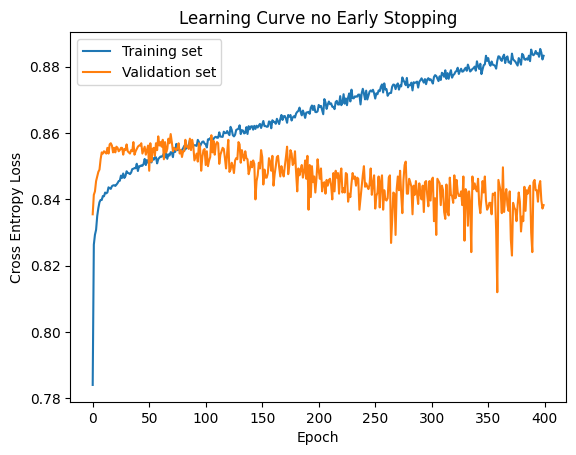

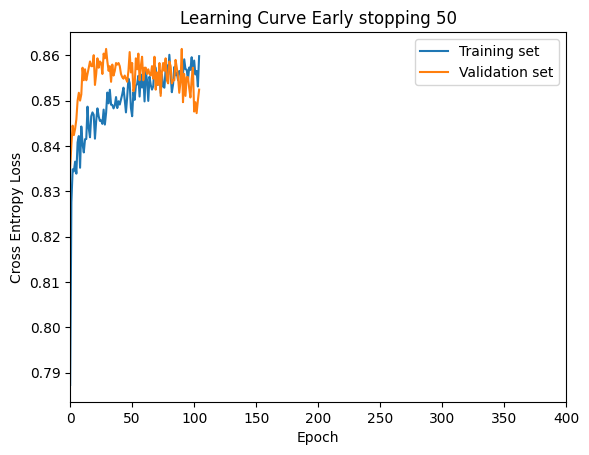

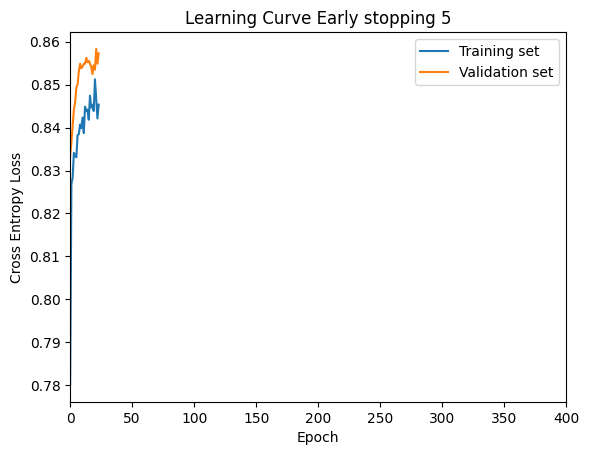

In [109]:
plt.figure()
plt.plot(train_history_df["epoch"],train_history_df["accuracy"], label = "Training set")
plt.plot(val_history_df["epoch"],val_history_df["accuracy"], label = "Validation set")
plt.title("Learning Curve no Early Stopping")
plt.ylabel("Cross Entropy Loss")
plt.xlabel("Epoch")
plt.legend()

plt.figure()
plt.plot(train_history_es_50["epoch"],train_history_es_50["accuracy"], label = "Training set")
plt.plot(val_history_es_50["epoch"],val_history_es_50["accuracy"], label = "Validation set")
plt.title("Learning Curve Early stopping 50")
plt.ylabel("Cross Entropy Loss")
plt.xlabel("Epoch")
plt.xlim(0,400)
plt.legend()

plt.figure()
plt.plot(train_history_es_5["epoch"],train_history_es_5["accuracy"], label = "Training set")
plt.plot(val_history_es_5["epoch"],val_history_es_5["accuracy"], label = "Validation set")
plt.title("Learning Curve Early stopping 5")
plt.ylabel("Cross Entropy Loss")
plt.xlabel("Epoch")
plt.xlim(0,400)
plt.legend()

#### comments
As we can observe from the figure by applying early stopping when we want to stop training, and thus reduce  over fitting by stop the training earlier.
One drawback of the early stopping is that we introduce one more parameter that we have to tune during the training.
If we have enough computational power we can choose a large patient.
Note that when finding the best loss so far we can also store the weight to assess them later.

# B. Reduce the Size of the Network

The capacity (total number of parameters) of the model affects the training process. If the parameters are too numerous compared to the difficulty of the underlying problem, it's very easy to overfit.

To address this issue, reduce the total number of parameters in the model by decreasing the number of units in each layer, and then comment on the results.

**Steps:**
1. Reduce the size of the network by lowering the number of units. You can use 60 units for the first layer and 20 units for the second one.
2. Train your model without early stopping.
3. Compare the learning curve of this model with the learning curve of the larger model we trained without early stopping (used in section Learning Curves and Overfitting).

# Solution

In [129]:
class NeuralNetworkSmall(torch.nn.Module):
    """
    Simple two layer neural network for regression
    """
    def __init__(self, num_input_features):
        super().__init__()
        
        # layer 1
        layer_1_units = 60
        self.layer_1 = torch.nn.Linear(in_features=num_input_features,
                                       out_features=layer_1_units)
        self.activation_1 = torch.nn.ReLU()
        
        # layer  2
        layer_2_units = 20
        self.layer_2 = torch.nn.Linear(in_features=layer_1_units,
                                       out_features=layer_2_units)
        self.activation_2 = torch.nn.ReLU()
        
        # layer output layer
        self.out_layer = torch.nn.Linear(in_features=layer_2_units,
                                         out_features=1)
        self.out_activation= torch.nn.Sigmoid()

    def forward(self, x):
        x_1 = self.activation_1( self.layer_1( x ) )
        x_2 = self.activation_2( self.layer_2( x_1 ) )
        output = self.out_activation(self.out_layer(x_2))
        return output

In [126]:
model = NeuralNetworkSmall(num_input_features=13)

lr = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr=lr, weight_decay=0.00)
loss_fn = torch.nn.BCELoss() # binary cross entropy 
                                                                                                # not active
model, val_history_small, train_history_small, best_loss, best_epoch, best_weights = train_loop(patient = 400,
                                                                                                epochs=400,
                                                                                                model=model,
                                                                                                optimizer=optimizer,
                                                                                                loss_fn=loss_fn)


Epoch 0/400:  loss:0.526, accuracy-:0.758, val_loss:0.458, val_accuracy->0.761
Epoch 10/400:  loss:0.339, accuracy-:0.838, val_loss:0.330, val_accuracy->0.857
Epoch 20/400:  loss:0.332, accuracy-:0.841, val_loss:0.328, val_accuracy->0.853
Epoch 30/400:  loss:0.319, accuracy-:0.848, val_loss:0.328, val_accuracy->0.853
Epoch 40/400:  loss:0.316, accuracy-:0.849, val_loss:0.324, val_accuracy->0.855
Epoch 50/400:  loss:0.319, accuracy-:0.846, val_loss:0.323, val_accuracy->0.858
Epoch 60/400:  loss:0.316, accuracy-:0.854, val_loss:0.325, val_accuracy->0.853
Epoch 70/400:  loss:0.314, accuracy-:0.853, val_loss:0.324, val_accuracy->0.856
Epoch 80/400:  loss:0.315, accuracy-:0.846, val_loss:0.323, val_accuracy->0.858
Epoch 90/400:  loss:0.309, accuracy-:0.855, val_loss:0.323, val_accuracy->0.856
Epoch 100/400:  loss:0.313, accuracy-:0.850, val_loss:0.321, val_accuracy->0.858
Epoch 110/400:  loss:0.302, accuracy-:0.855, val_loss:0.320, val_accuracy->0.856
Epoch 120/400:  loss:0.303, accuracy-:0

array(0.31485048, dtype=float32)

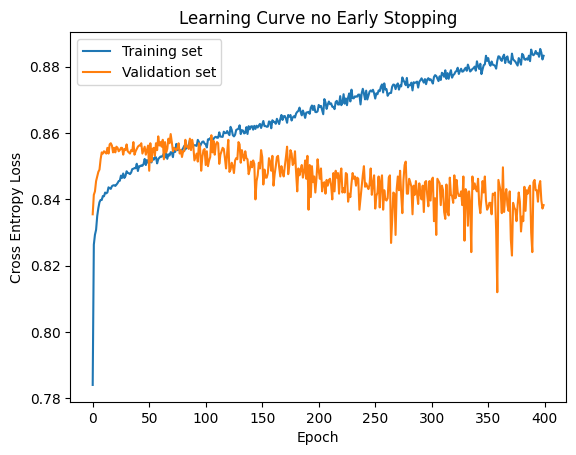

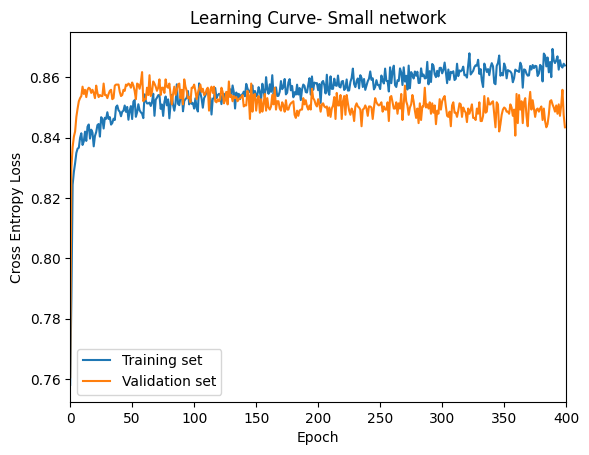

In [130]:
plt.figure()
plt.plot(train_history_df["epoch"],train_history_df["accuracy"], label = "Training set")
plt.plot(val_history_df["epoch"],val_history_df["accuracy"], label = "Validation set")
plt.title("Learning Curve no Early Stopping")
plt.ylabel("Cross Entropy Loss")
plt.xlabel("Epoch")
plt.legend()

plt.figure()
plt.plot(train_history_small["epoch"],train_history_small["accuracy"], label = "Training set")
plt.plot(val_history_small["epoch"],val_history_small["accuracy"], label = "Validation set")
plt.title("Learning Curve- Small network")
plt.ylabel("Cross Entropy Loss")
plt.xlabel("Epoch")
plt.xlim(0,400)
plt.legend()

In [133]:
print("Best loss of big network :", val_history_df["accuracy"].max() )
print("Best loss of small network :", val_history_small["accuracy"].max() )

Best loss of big network : 0.85970974
Best loss of small network : 0.861783


#### comments
We can see that reducing the network capacity prevents the model to over-fit the training data.
This is because having less parameter, the model is not able to memorise training data by extracting complex pattern that do not hold.
One draw back again is that we have to find the optimal network size.  
A good approach is to specify different architecture (tiny, small ,big) and test them to find the optimal one using early stopping.

# C. Weight Regularization

Weight Regularization is another very famous technique to reduce overfitting.
The concept of regularization is to add a constraint in the loss function to keep the weights of the model small.

To get the intuition, weights regularization discourages the model from fitting the training data too closely and forces it to focus on the most important features. By constraining the model's weights, it can generalize better to new data because it's less likely to memorize the training examples and is more likely to capture underlying patterns and relationships in the data.

A very famous and easy regularization is the L2-regularization where we modify the loss function as follows:

$$ \text{Total Loss} = \mathbb{E}_{x,y \sim P_{data}} \left[ loss(f_w(x),y) \right] + \lambda \sum_{j=1}^{p} w_j^2 $$

Where $\lambda$ is a scaling paramter, $loss$ in the loss function, $w$ the parameters of the model. Finally, $p$ indicates the set of different parameters

In pytorch is very easy to apply L2-regularization. You can do that using the weight_decay ($\lambda$) parameter of the optimizer class.

```python
torch.optim.SGD(model.parameters(), lr=lr, weight_decay=λ)


**Steps :**
1) Use $\lambda = 0.01$ and train your model using L2 regularization, as explained begore.  
Use the model architeture with the more paramter and dont aply early stoping to see the effect.
3) Compare with the initial training without early stoping (used in section Learning Curves and Overfitting) and comment on the results.

# Solution

In [136]:
model = NeuralNetwork(num_input_features=13)

lr = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr=lr, weight_decay=0.01)
loss_fn = torch.nn.BCELoss() # binary cross entropy 
                                                                                                # not active
model, val_history_reg, train_history_reg, best_loss, best_epoch, best_weights = train_loop(patient = 400,
                                                                                            epochs=400,
                                                                                            model=model,
                                                                                            optimizer=optimizer,
                                                                                            loss_fn=loss_fn)


Epoch 0/400:  loss:0.475, accuracy-:0.769, val_loss:0.395, val_accuracy->0.831
Epoch 10/400:  loss:0.339, accuracy-:0.842, val_loss:0.333, val_accuracy->0.852
Epoch 20/400:  loss:0.338, accuracy-:0.840, val_loss:0.331, val_accuracy->0.852
Epoch 30/400:  loss:0.337, accuracy-:0.841, val_loss:0.330, val_accuracy->0.850
Epoch 40/400:  loss:0.339, accuracy-:0.839, val_loss:0.330, val_accuracy->0.850
Epoch 50/400:  loss:0.338, accuracy-:0.841, val_loss:0.331, val_accuracy->0.849
Epoch 60/400:  loss:0.336, accuracy-:0.844, val_loss:0.330, val_accuracy->0.852
Epoch 70/400:  loss:0.341, accuracy-:0.838, val_loss:0.329, val_accuracy->0.850
Epoch 80/400:  loss:0.335, accuracy-:0.842, val_loss:0.330, val_accuracy->0.850
Epoch 90/400:  loss:0.336, accuracy-:0.840, val_loss:0.329, val_accuracy->0.847
Epoch 100/400:  loss:0.337, accuracy-:0.842, val_loss:0.330, val_accuracy->0.850
Epoch 110/400:  loss:0.344, accuracy-:0.835, val_loss:0.331, val_accuracy->0.850
Epoch 120/400:  loss:0.337, accuracy-:0

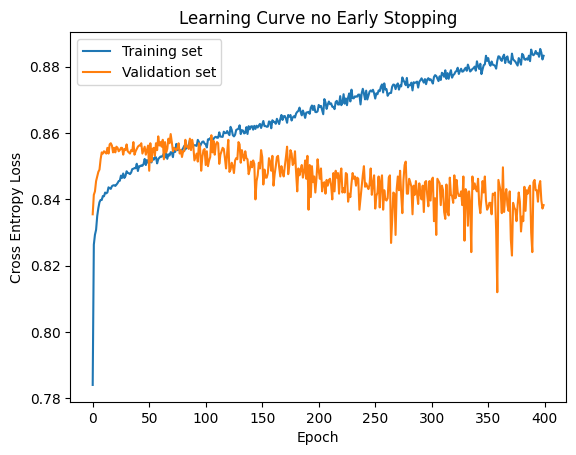

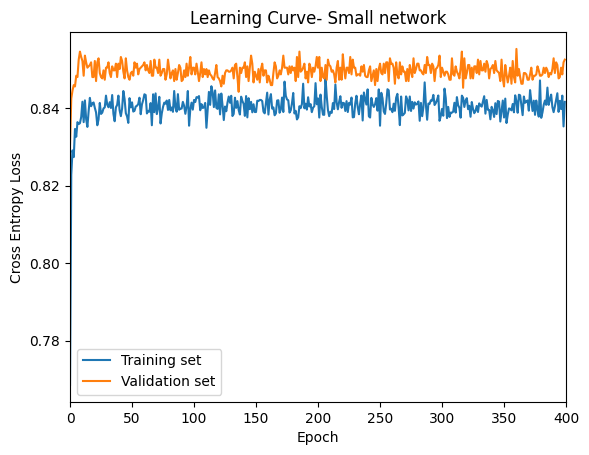

In [137]:
plt.figure()
plt.plot(train_history_df["epoch"],train_history_df["accuracy"], label = "Training set")
plt.plot(val_history_df["epoch"],val_history_df["accuracy"], label = "Validation set")
plt.title("Learning Curve no Early Stopping")
plt.ylabel("Cross Entropy Loss")
plt.xlabel("Epoch")
plt.legend()

plt.figure()
plt.plot(train_history_reg["epoch"],train_history_reg["accuracy"], label = "Training set")
plt.plot(val_history_reg["epoch"],val_history_reg["accuracy"], label = "Validation set")
plt.title("Learning Curve- Small network")
plt.ylabel("Cross Entropy Loss")
plt.xlabel("Epoch")
plt.xlim(0,400)
plt.legend()

#### comments
Adding regulation term can also help us to prevent overting.  
As all the previus methods we introduce one new hyperparameter that we have to fit.  
finaly in practive we using all the aforemention method.